In [1]:
import matplotlib as matplotlib
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict


Download the Data  : 

In [ ]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
print("Data is ready")

Data is ready


In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
print("train data size is :"+ str(train.shape))
print("test data size is :"+ str(test.shape))

train data size is :(42000, 785)
test data size is :(28000, 784)


Data Preparation :

# splitting train data set into y that represents the target label , and x that represents the training examples.

In [9]:
y=train['label']
x=train.drop('label',axis='columns')

In [10]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1


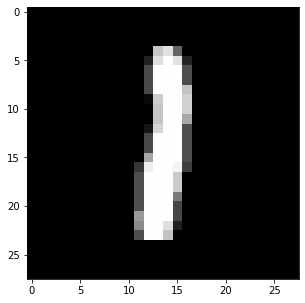

In [11]:
# lets display some digit from the data set 

plt.figure(figsize=(5,5))
some_digit=140
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [12]:
#Display a group of digits

def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

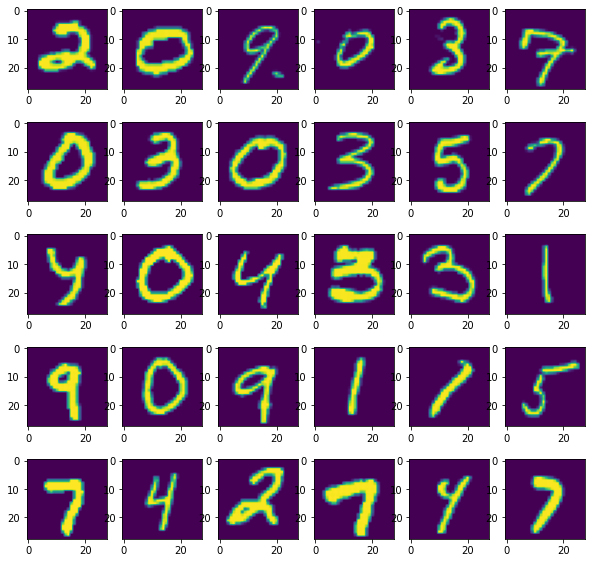

In [13]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    print_image(i, test)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

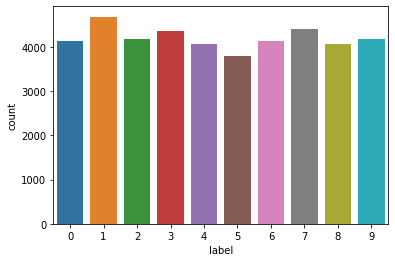

In [14]:
# Check that the data is balanced :
sns.countplot(train['label'])

In [15]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
# train test split :
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Models Building

# 1 - KNN 

In [17]:
# Model fitting
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
# Model prediction
KNN_y_pred = KNN_classifier.predict(x_test)
print(KNN_y_pred)

[8 1 9 ... 5 5 0]


In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, KNN_y_pred))
print(classification_report(y_test, KNN_y_pred))
print(confusion_matrix(y_test, KNN_y_pred))

0.9655555555555555
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.94      1.00      0.97      1389
           2       0.99      0.95      0.97      1294
           3       0.95      0.96      0.96      1355
           4       0.98      0.97      0.97      1222
           5       0.96      0.95      0.96      1085
           6       0.97      0.99      0.98      1256
           7       0.96      0.96      0.96      1359
           8       0.99      0.93      0.96      1209
           9       0.95      0.95      0.95      1231

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600

[[1196    0    0    0    0    0    4    0    0    0]
 [   0 1384    1    0    0    0    4    0    0    0]
 [  10   19 1223    4    2    2    2   28    4    0]
 [   3    5    9 1299    0   14    2    8    7    8]
 [   2   1

In [20]:
# We can say that 5NN Model gets accuracy of 97% and it's performance is very good :) ,But let us look at the confusion matrix 

# Confusion Matrix Heatmap for more visulaization 

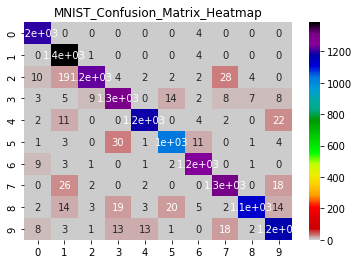

In [21]:
S=sns.heatmap(confusion_matrix(y_test, KNN_y_pred), annot=True ,cmap="nipy_spectral_r").set_title("MNIST_Confusion_Matrix_Heatmap")


In [22]:
# Let's try K=7 instead of K=5 and see the performance:

from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 7)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
KNN_y_pred = KNN_classifier.predict(x_test)
print(KNN_y_pred)

[8 1 9 ... 5 5 0]


In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, KNN_y_pred))
print(classification_report(y_test, KNN_y_pred))
print(confusion_matrix(y_test, KNN_y_pred))

0.9633333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.94      1.00      0.97      1389
           2       0.98      0.94      0.96      1294
           3       0.95      0.95      0.95      1355
           4       0.98      0.96      0.97      1222
           5       0.96      0.95      0.96      1085
           6       0.97      0.98      0.98      1256
           7       0.95      0.96      0.96      1359
           8       0.99      0.93      0.96      1209
           9       0.94      0.95      0.95      1231

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

[[1196    0    0    0    0    0    4    0    0    0]
 [   0 1384    1    0    0    0    4    0    0    0]
 [  10   19 1218    6    2    1    2   31    4    1]
 [   4    7    9 1292    0   14    1   11    8    9]
 [   2   1

In [25]:
# 5NN is better than 7NN but both performance are close together 
# 5NN accuracy is 97% 
# 7NN accuracy is 96%

# Let's Try Another Model

# 2-Training a Binary Classifier (SGD Classifier)


In [26]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [27]:
# Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic
# Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

5


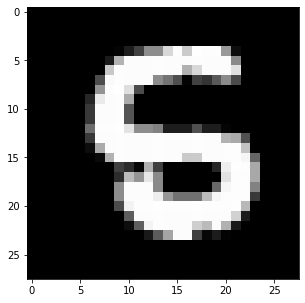

In [28]:
plt.figure(figsize=(5,5))
some_digit=19
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

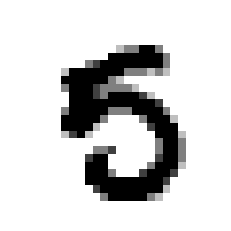

5


In [29]:
some_digit = x_train.iloc[44]
some_digit_image = some_digit.to_numpy().reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y_train.iloc[44])

In [30]:
# Now, detect images of the number 5:
sgd_clf.predict([some_digit])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [31]:
# If the number was any number but not 5 :
some_digit = x_train.iloc[4]
print(y_train.iloc[4])
sgd_clf.predict([some_digit])

1


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([False])

# SGD Confusion Matrix

#Each row in a confusion matrix represents an actual class, while each column represents
#a predicted class. -->

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)  

array([[26320,   370],
       [  719,  1991]])

In [34]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[26690,     0],
       [    0,  2710]])

In [35]:
# Let's check for the performance score:
from sklearn.metrics import precision_score, recall_score ,f1_score
print("precision score is: "+ str(precision_score(y_train_5, y_train_pred)))
print("recall score is: "+str(recall_score(y_train_5, y_train_pred)))
print("f1 score is: "+str(f1_score(y_train_5, y_train_pred)))

precision score is: 0.8432867429055485
recall score is: 0.7346863468634687
f1 score is: 0.7852494577006507


#Precision/Recall Tradeoff

In [36]:
# lowering the threshold increases recall and reduces precision.
# Instead of calling the classifier’s predict() method, you can call its decision_function() method
# which returns a score for each instance, and then make predictions based on those scores using any threshold you want:)
# Remember that: A high-precision classifier is not very useful if its recall is too low!

In [37]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([-8814.37859762])

In [38]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [39]:
# Let's reduce the threshold
threshold = -9000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [40]:
#Let's plot the precision_recall_curve
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

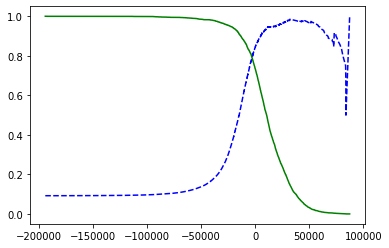

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Multiclass classifier

# 3-RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
RF_pred=RF.predict(x_test)
RF_pred
print("classification report \n \n"+ classification_report(y_test, RF_pred))
print("confusion matrix \n")
print(confusion_matrix(y_test, RF_pred))

classification report 
 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1200
           1       0.98      0.99      0.99      1389
           2       0.96      0.96      0.96      1294
           3       0.95      0.93      0.94      1355
           4       0.96      0.97      0.97      1222
           5       0.96      0.96      0.96      1085
           6       0.97      0.98      0.97      1256
           7       0.97      0.95      0.96      1359
           8       0.95      0.96      0.95      1209
           9       0.93      0.94      0.94      1231

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

confusion matrix 

[[1183    0    2    2    2    1    6    0    4    0]
 [   0 1372    5    4    1    2    1    1    2    1]
 [   5    4 1240    7    9    2    5   10   11    1]
 [   4    1   15 1264    2   21    3  

In [44]:
# RF Classifier has an accuracy of 96%

# Thank You 
Amany Maayah